## Modules

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


import warnings
warnings.filterwarnings('ignore')

## Load data

In [3]:
data= pd.read_csv("Google_Stock_Price_Train.csv")
test= pd.read_csv("Google_Stock_Price_Test.csv")

In [30]:
training_set= data.iloc[:,1:2].values
real_price= test.iloc[:,1:2]

## Preprocessing

### Scaler

In [9]:
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled= sc.fit_transform(training_set)

### Add lags

In [10]:
x_train= []
y_train=[]
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train= np.array(x_train), np.array(y_train)

In [13]:
x_train= np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

## Model

In [21]:
regressor= Sequential()

### Architecture

#### Add layers

In [23]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape= (x_train.shape[1],1)))
regressor.add(Dropout(.2))

In [24]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(.2))

In [25]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(.2))

In [26]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(.2))

In [27]:
regressor.add(Dense(units=1))

#### Optimizier

In [28]:
regressor.compile(optimizer='adam', loss="mean_squared_error")

### Train

In [36]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0022
Epoch 2/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0024
Epoch 3/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0023
Epoch 4/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0024
Epoch 5/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0023
Epoch 6/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0022
Epoch 7/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0022
Epoch 8/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0021
Epoch 9/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0020
Epoch 10/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0022
Epoch 11/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0021
Epoch 12/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0021
Epoch 13/100
38/38 [

### Predictions

In [31]:
dataset_total= pd.concat((data["Open"], test["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(test)-60:].values
inputs= inputs.reshape(-1,1)
inputs= sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test= np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))    

In [37]:
predicted= regressor.predict(x_test)

1/1 [==============================] - 0s 45ms/step


In [38]:
predicted= sc.inverse_transform(predicted)

In [39]:
predicted

array([[778.8638 ],
       [776.37946],
       [780.3238 ],
       [781.42676],
       [785.4118 ],
       [792.9937 ],
       [796.3328 ],
       [794.8736 ],
       [795.13983],
       [796.21625],
       [796.7029 ],
       [796.38306],
       [796.12646],
       [797.28705],
       [798.2423 ],
       [806.5102 ],
       [814.0916 ],
       [820.1181 ],
       [819.99133],
       [808.9051 ]], dtype=float32)

## Results

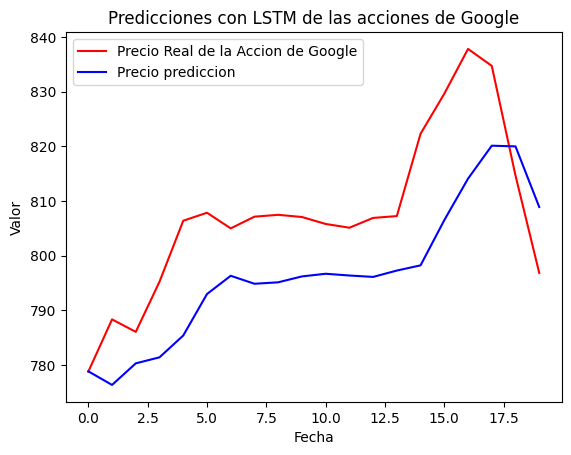

In [41]:
plt.plot(real_price, color= "red",label= "Precio Real de la Accion de Google")
plt.plot(predicted, color= "blue", label= "Precio prediccion")
plt.title("Predicciones con LSTM de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()